In [4]:
from pandas_datareader import data
import yfinance as yf
yf.pdr_override()

In [5]:
mtr = data.get_data_yahoo(tickers='0066.HK', start = "2020-01-01", end = "2020-12-31")
mtr

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,46.099998,46.150002,45.500000,45.900002,40.901691,3603916
2020-01-03,46.299999,46.450001,45.549999,45.700001,40.723473,3378631
2020-01-06,45.700001,45.950001,45.000000,45.500000,40.545250,2761345
2020-01-07,45.900002,46.000000,45.049999,45.200001,40.277912,2981976
2020-01-08,45.000000,45.500000,44.700001,45.250000,40.322472,3473167
...,...,...,...,...,...,...
2020-12-23,43.400002,43.500000,42.599998,43.299999,39.747517,2995849
2020-12-24,43.549999,43.549999,43.549999,43.549999,39.977009,0
2020-12-28,43.450001,44.000000,43.400002,43.849998,40.252392,2311298


In [6]:
mtr.describe()

,Open,High,Low,Close,Adj Close,Volume
count,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02
mean,41.413360,41.784008,40.942510,41.384818,37.488707,4.684331e+06
std,2.362057,2.324900,2.338359,2.362095,1.907158,2.671848e+06
min,36.500000,37.200001,36.200001,36.849998,33.617889,0.000000e+00
25%,39.500000,40.049999,39.099998,39.500000,35.995234,2.989595e+06
50%,41.000000,41.299999,40.349998,40.900002,37.130211,3.847710e+06
75%,43.000000,43.200001,42.475000,42.849998,38.898411,5.593484e+06
max,47.599998,47.799999,47.299999,47.799999,42.594780,2.244095e+07


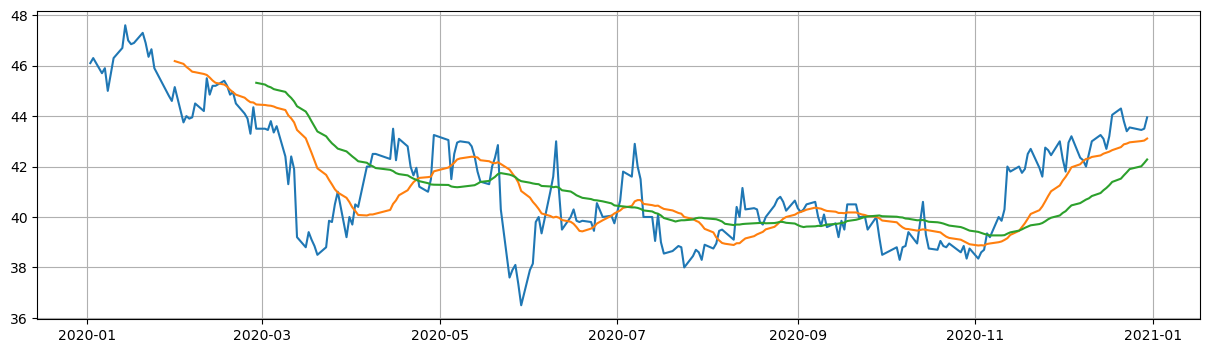

In [8]:
import matplotlib.pyplot as plt
import numpy as np

mtr['20d']=np.round(mtr['Open'].rolling(20).mean(),2)
mtr['40d']=np.round(mtr['Open'].rolling(40).mean(),2)
plt.figure(figsize=(15,4))
plt.grid(True)
plt.plot(mtr[['Open','20d','40d']])
plt.show()

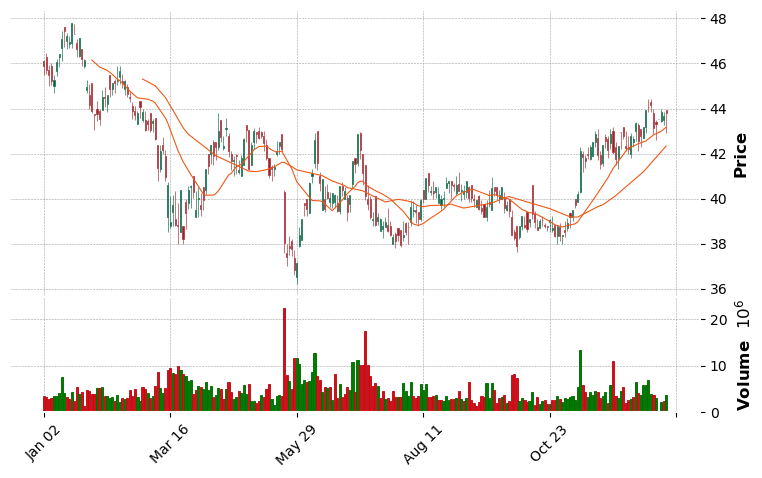

In [9]:
import mplfinance as mpf
mpf.plot(mtr,type='candle',style='charles',figratio=(10,6),mav=(20,40), volume=True)

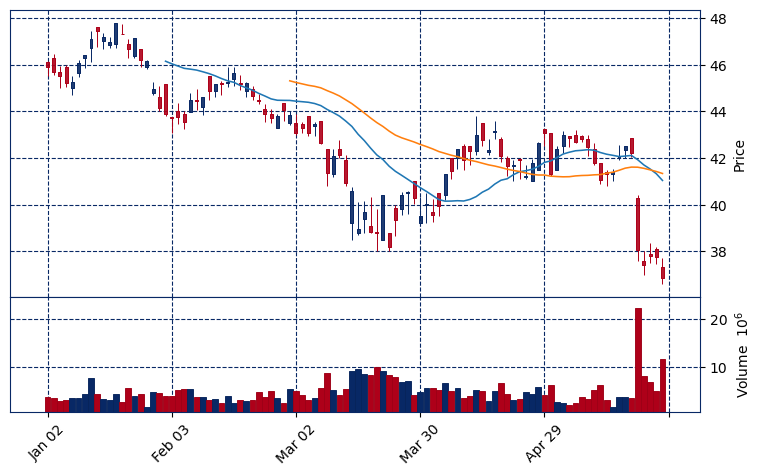

In [10]:
mpf.plot(mtr[:100], type='candle',style='sas',figratio=(10,6),mav=(20,40),volume=True)

In [11]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

In [12]:
df = data.get_data_yahoo(tickers='^HSI',start='2004-01-02', end='2009-06-30')
df = df['Close']
df

[*********************100%***********************]  1 of 1 completed


Date
2004-01-02    12801.480469
2004-01-05    13005.330078
2004-01-06    13036.320312
2004-01-07    13157.679688
2004-01-08    13203.589844
                  ...     
2009-06-23    17538.369141
2009-06-24    17892.150391
2009-06-25    18275.029297
2009-06-26    18600.259766
2009-06-29    18528.509766
Name: Close, Length: 1354, dtype: float64

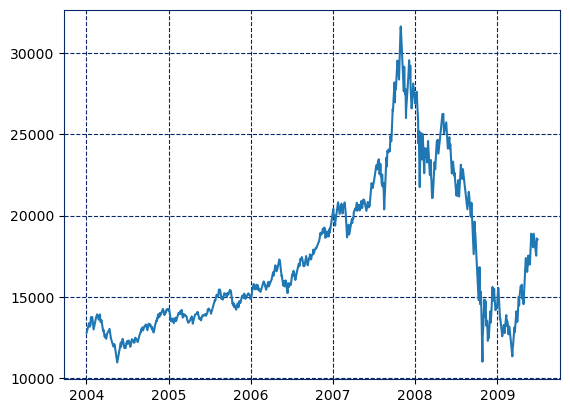

In [13]:
plt.plot(df)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
rdata = scaler.fit_transform(np.array(df).reshape(-1,1))
training_size=int(len(rdata)*0.65)
train_period,test_period=rdata[:training_size],rdata[training_size:]

In [15]:
from keras.preprocessing.sequence import TimeseriesGenerator
train = TimeseriesGenerator(train_period, train_period, length=100, batch_size=1000)
test = TimeseriesGenerator(test_period, test_period, length=100, batch_size=1000)
X_train, y_train = list(train)[0][0], list(train)[0][1]
X_test, y_test = list(test)[0][0], list(test)[0][1]

2023-06-28 11:19:16.062187: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-28 11:19:16.104463: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-28 11:19:16.105937: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-28 11:19:16.881861: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [17]:
model=Sequential() 
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) 
model.add(LSTM(50,return_sequences=True)) 
model.add(LSTM(50)) 
model.add(Dense(1)) 
model.compile(loss='mean_squared_error',optimizer='adam')

2023-06-28 11:19:33.223258: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-28 11:19:33.224850: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-28 11:19:33.225877: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
y_train

array([42.        , 41.79999924, 38.75      , 40.40000153, 40.09999847,
       47.59999847, 42.75      , 38.90000153, 42.40000153, 43.09999847,
       39.84999847, 38.75      , 42.65000153, 43.25      , 45.90000153,
       43.        , 39.79999924, 40.45000076, 44.09999847, 38.95000076,
       43.20000076, 43.20000076, 41.79999924, 39.29999924, 40.        ,
       39.45000076, 38.84999847, 40.        , 38.5       , 45.        ,
       40.        , 40.29999924, 44.59999847, 46.65000153, 43.        ,
       41.90000153, 45.15000153, 40.29999924, 38.75      , 42.95000076,
       45.5       , 38.84999847, 46.70000076, 42.        , 39.5       ,
       41.59999847, 45.90000153, 43.5       , 38.65000153, 44.5       ,
       43.5       , 38.15000153, 42.29999924, 38.84999847, 40.04999924,
       42.34999847, 42.34999847, 39.59999847, 39.75      , 46.29999924,
       45.20000076, 42.79999924, 42.        , 39.5       , 44.95000076,
       38.95000076, 38.59999847, 43.90000153, 39.84999847, 37.59

In [19]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=True)

Epoch 1/10


2023-06-28 11:19:47.475339: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-28 11:19:47.477268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-28 11:19:47.478366: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

13/13 [==============================] - ETA: 0s - loss: 0.0158

2023-06-28 11:19:52.275367: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-28 11:19:52.276931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-28 11:19:52.277974: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

13/13 [==============================] - 6s 179ms/step - loss: 0.0158 - val_loss: 0.0240
Epoch 2/10
13/13 [==============================] - 2s 119ms/step - loss: 0.0034 - val_loss: 0.0045
Epoch 3/10
13/13 [==============================] - 1s 111ms/step - loss: 0.0010 - val_loss: 0.0089
Epoch 4/10
13/13 [==============================] - 1s 104ms/step - loss: 5.3611e-04 - val_loss: 0.0092
Epoch 5/10
13/13 [==============================] - 1s 106ms/step - loss: 4.5321e-04 - val_loss: 0.0061
Epoch 6/10
13/13 [==============================] - 1s 117ms/step - loss: 3.9649e-04 - val_loss: 0.0049
Epoch 7/10
13/13 [==============================] - 2s 121ms/step - loss: 3.9236e-04 - val_loss: 0.0054
Epoch 8/10
13/13 [==============================] - 1s 110ms/step - loss: 3.9782e-04 - val_loss: 0.0055
Epoch 9/10
13/13 [==============================] - 1s 110ms/step - loss: 3.7430e-04 - val_loss: 0.0057
Epoch 10/10
13/13 [==============================] - 2s 119ms/step - loss: 3.7037e-04 -

In [20]:
train_predict = scaler.inverse_transform(model.predict(X_train))
test_predict = scaler.inverse_transform(model.predict(X_test))

2023-06-28 11:21:15.192718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-28 11:21:15.194346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-28 11:21:15.195340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12/12 [==============================] - 0s 26ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

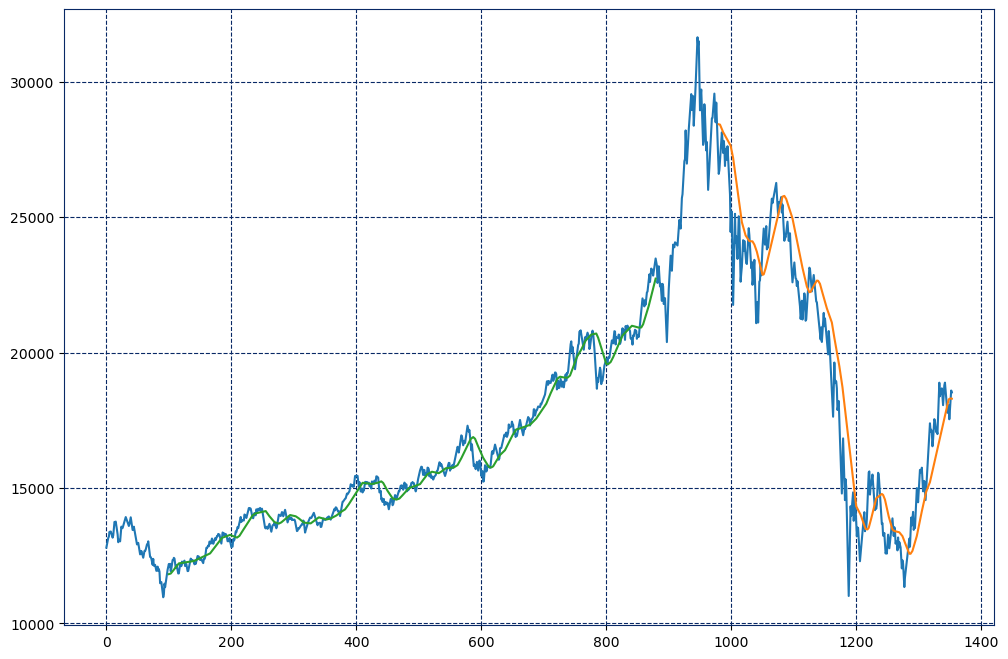

In [22]:
look_back=100
trainPredictPlot=np.empty_like(rdata)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict

testPredictPlot=np.empty_like(rdata)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2):len(rdata)] = test_predict

plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(rdata))
plt.plot(testPredictPlot)
plt.plot(trainPredictPlot)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

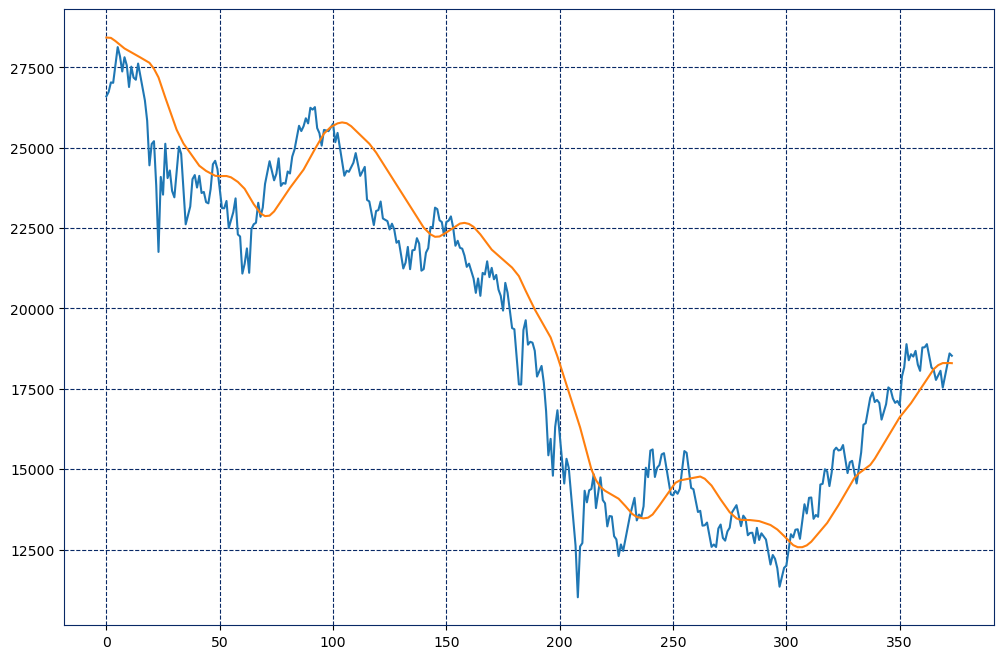

In [24]:
plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(rdata)[len(train_predict)+(look_back*2):len(rdata)])
plt.plot(test_predict)
plt.show

In [25]:
today =mtr['Open'].iloc[:len(mtr)-1].reset_index(drop=True)
nextday = mtr['Open'].iloc[1:].reset_index(drop=True)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

today = np.array(today).reshape(-1,1)
nextday = np.array(nextday)
X_train, X_test, y_train, y_test = train_test_split(today, 
                       nextday, test_size=0.2)

In [27]:
reg=linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [30]:
df = pd.DataFrame()
df['X_test']=X_test.reshape((1,-1))[0]
df['y_test']=y_test
df['y_pred']=y_pred
df.head(10)

,X_test,y_test,y_pred
0,38.700001,39.049999,38.830399
1,47.599998,47.000000,47.223378
2,38.849998,38.500000,38.971852
3,40.400002,40.000000,40.433554
4,45.650002,46.299999,45.384470
5,41.400002,41.299999,41.376585
6,38.950001,40.599998,39.066157
7,40.450001,40.700001,40.480705
8,44.849998,45.200001,44.630041
9,43.000000,43.250000,42.885434


In [29]:
import pandas as pd

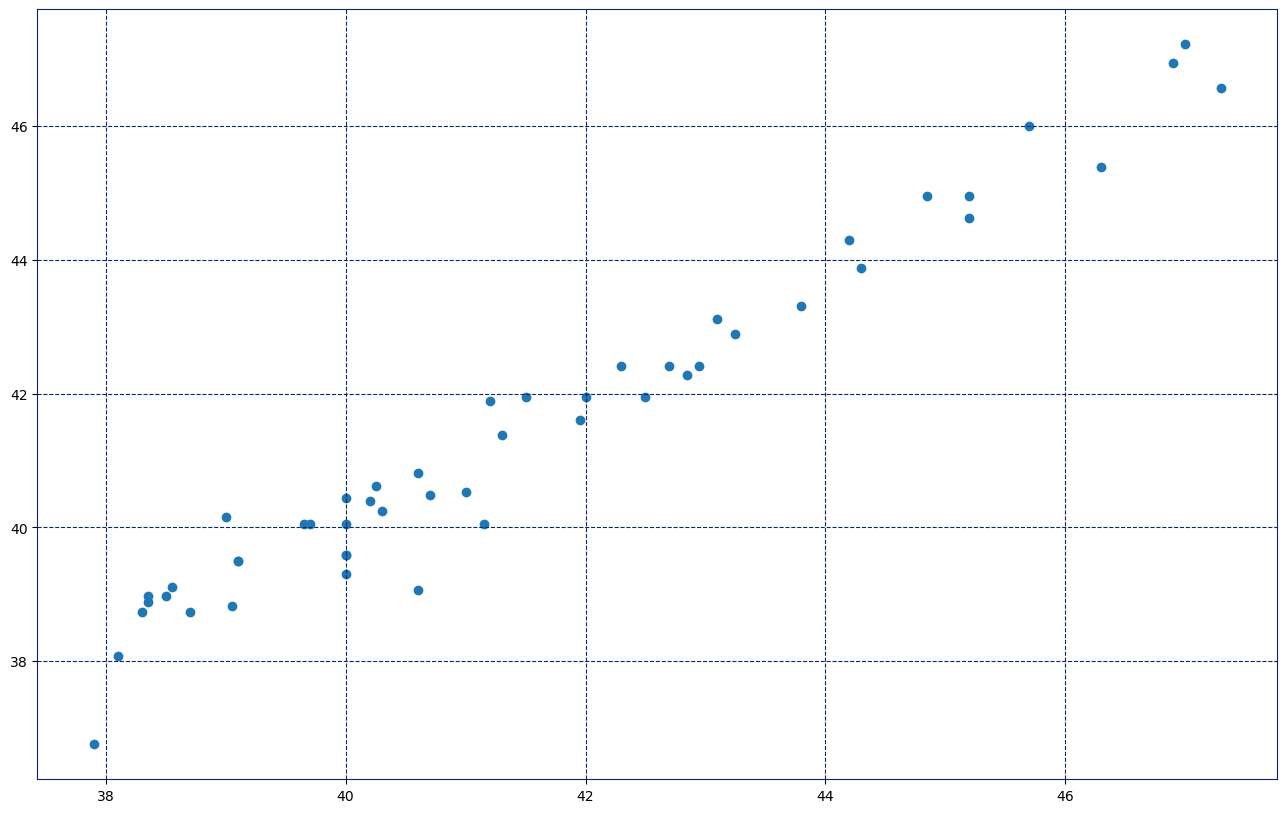

In [31]:
plt.figure(figsize=(16,10))
plt.scatter(y_test,y_pred)

In [32]:
res_msr = mean_squared_error(y_test, y_pred) 
res_r2_score = r2_score(y_test, y_pred)
print(f'mean_squared_error = {res_msr} and r2_score = {res_r2_score}')

mean_squared_error = 0.2809519687649362 and r2_score = 0.9580812647768516


In [34]:
ticker = input("Input stock ticker: ")
start = input("start date: ")
end = input("end data: ")
df = data.get_data_yahoo(tickers=ticker, start=start, end=end)
df

Input stock ticker:  0005.HK
start date:  2021-01-01
end data:  2023-06-01


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,40.299999,40.599998,39.900002,40.450001,36.156418,20433690
2021-01-05,40.000000,40.549999,39.750000,40.150002,35.888264,17133338
2021-01-06,40.150002,41.750000,39.799999,41.500000,37.094971,37778767
2021-01-07,43.500000,43.799999,42.849998,43.400002,38.793293,71074555
2021-01-08,43.700001,43.700001,42.549999,43.400002,38.793293,36759304
...,...,...,...,...,...,...
2023-05-24,59.799999,59.799999,58.950001,59.250000,59.250000,14260724
2023-05-25,57.950001,58.400002,57.849998,58.349998,58.349998,18267454
2023-05-29,58.650002,59.150002,58.500000,58.750000,58.750000,14821414
